In [116]:
#librerias
import pandas as pd
import numpy as np
import pyodbc

import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')


**1. Selección de datos**

In [117]:
#Conexión database
conn = pyodbc.connect(DRIVER='{ODBC Driver 17 for SQL Server}',
                      SERVER='dblatinkadwh.database.windows.net',
                      DATABASE='DWH_LaTinka',
                      UID='sandra.sanchez',
                      PWD='Latinka01*')
print(conn)


In [118]:
#No se tomó en cuenta los datos con target null
q0 = """SELECT *
        FROM [EDS].[TABLON_VARIABLE_FUGA]
        WHERE CODMES=202304"""
df = pd.read_sql_query(q0,conn)

#Cerrar conexión 
conn.close()

In [119]:
df

,CODMES,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION,FECHA_PRIMERA_RECARGA,FECHA_ULTIMA_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,INDICE_FELICIDAD
0,202304,1353400.0,30.0,1.0,2022-08-10,2022-08-10,Tinka,5. Ocasional,4. Perdido,5. Muy Bajo,1977-07-31,0.0
1,202304,959710.0,20.0,1.0,2022-12-02,2022-12-02,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1977-07-27,0.0
2,202304,1815598.0,80.0,1.0,2022-07-18,2022-07-18,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1981-10-21,1.0
3,202304,1986982.0,90.0,1.0,2022-11-06,2022-11-06,None,5. Ocasional,4. Perdido,5. Muy Bajo,1981-05-22,0.0
4,202304,2368223.0,300.0,1.0,2022-12-30,2022-12-30,Te Apuesto,5. Ocasional,4. Perdido,4. Bajo,1990-06-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
470125,202304,857247.0,20.0,1.0,2022-05-05,2022-05-05,Te Apuesto,3. Frecuente,4. Perdido,5. Muy Bajo,1996-05-09,1.0
470126,202304,1950088.0,20.0,1.0,2022-10-14,2022-10-14,Tinka,4. Habitual,4. Perdido,5. Muy Bajo,1993-10-26,0.0
470127,202304,681724.0,50.0,1.0,2022-05-17,2022-05-17,Raspaya,5. Ocasional,4. Perdido,5. Muy Bajo,1982-03-17,0.0
470128,202304,1277514.0,288.0,1.0,2022-10-23,2022-10-23,Tinka,5. Ocasional,4. Perdido,4. Bajo,1997-08-14,0.0


**2. Procesamiento**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470130 entries, 0 to 470129
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CODMES                 470130 non-null  int64  
 1   ID_CLIENTE             470129 non-null  float64
 2   TOTAL_RECARGA          470130 non-null  float64
 3   TOTAL_TRANSACCION      470130 non-null  float64
 4   FECHA_PRIMERA_RECARGA  470130 non-null  object 
 5   FECHA_ULTIMA_RECARGA   470130 non-null  object 
 6   PRODUCTO_PRINCIPAL     457999 non-null  object 
 7   FRECUENCY              467873 non-null  object 
 8   RECENCY                467873 non-null  object 
 9   MONETARY               467873 non-null  object 
 10  FECHA_NACIMIENTO       470012 non-null  object 
 11  INDICE_FELICIDAD       470129 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 43.0+ MB


In [121]:
#Conversion de String a datetime
#df['FECHA_ALTA_SISTEMA'] = pd.to_datetime(df['FECHA_ALTA_SISTEMA'], format = "%Y-%m-%d")
df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], format = "%Y-%m-%d",errors='coerce')
df['FECHA_PRIMERA_RECARGA'] = pd.to_datetime(df['FECHA_PRIMERA_RECARGA'], format="%Y-%m-%d",errors='coerce')
df['FECHA_ULTIMA_RECARGA'] = pd.to_datetime(df['FECHA_ULTIMA_RECARGA'], format = "%Y-%m-%d",errors='coerce')

In [122]:
df.isnull().sum()

CODMES                       0
ID_CLIENTE                   1
TOTAL_RECARGA                0
TOTAL_TRANSACCION            0
FECHA_PRIMERA_RECARGA        0
FECHA_ULTIMA_RECARGA         0
PRODUCTO_PRINCIPAL       12131
FRECUENCY                 2257
RECENCY                   2257
MONETARY                  2257
FECHA_NACIMIENTO           120
INDICE_FELICIDAD             1
dtype: int64

In [123]:
df['INDICE_FELICIDAD'] = df['INDICE_FELICIDAD'].fillna(2)

In [124]:
#Eliminar filas con valores nulos 
df.dropna(inplace=True)

In [125]:
#Calular la Edad
df['EDAD'] = ((datetime.now() -df['FECHA_NACIMIENTO']).dt.days / 365).round(0).astype("int64")

In [126]:
df['DIAS_CON'] = (df['FECHA_ULTIMA_RECARGA'] -df['FECHA_PRIMERA_RECARGA']).dt.days


In [127]:
#Reclass variables
# df['PRODUCTO_PRINCIPAL'] = np.where(df['PRODUCTO_PRINCIPAL'] == 'Tinka', 1, 
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Kabala', 2,
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Te Apuesto', 3,
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Casino', 4,
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Gana Diario', 5,
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Raspaya', 6,
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Kinelo', 7,
#                                             np.where(df['PRODUCTO_PRINCIPAL'] == 'Ganagol', 8,9))))))))

# df['ESTADO_CLIENTE'] = np.where(df['ESTADO_CLIENTE'] == '4. No Activo',4,
#                                         np.where(df['ESTADO_CLIENTE'] == '2. Recurrente',2,
#                                         np.where(df['ESTADO_CLIENTE'] == '3. Esporadico',3,1)))

df['FRECUENCY'] = np.where(df['FRECUENCY'] == '1. Permanente',1,
                                   np.where(df['FRECUENCY'] == '1. Permanente',1,
                                   np.where(df['FRECUENCY'] == '2. Intensivo',2,
                                   np.where(df['FRECUENCY'] == '3. Frecuente',3,
                                   np.where(df['FRECUENCY'] == '4. Habitual',4,5)))))

df['MONETARY'] = np.where(df['MONETARY'] == '1. Muy Alto',1,
                          np.where(df['MONETARY'] == '2. Alto', 2,
                          np.where(df['MONETARY'] == '3. Medio', 3,
                          np.where(df['MONETARY'] == '4. Bajo', 4,5))))

df['RECENCY'] = np.where(df['RECENCY'] == '4. Perdido', 1, 0)

df['INDICE_FELICIDAD'] = np.where(df['INDICE_FELICIDAD'] == 'No Feliz',0,np.where(df['INDICE_FELICIDAD'] == 2,2,1))

In [131]:
df['PRODUCTO_PRINCIPAL'] = df['PRODUCTO_PRINCIPAL'].str.upper()

In [132]:
dat1 = pd.get_dummies(df.PRODUCTO_PRINCIPAL)

In [133]:
dat1

,CASINO,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
470125,0,0,0,0,0,0,0,1,0
470126,0,0,0,0,0,0,0,0,1
470127,0,0,0,0,0,0,1,0,0
470128,0,0,0,0,0,0,0,0,1


In [138]:
df_1 = pd.concat([df.drop("PRODUCTO_PRINCIPAL",axis=1),dat1],axis=1)

In [140]:
df_1.set_index('ID_CLIENTE',inplace=True)

In [143]:
df2 = df_1.loc[:, ['TOTAL_RECARGA', 'TOTAL_TRANSACCION',
                'FRECUENCY', 'MONETARY', 'RECENCY', 'EDAD', 'DIAS_CON', 'INDICE_FELICIDAD',
                   "CASINO", "DEPORTE VIRTUAL","GANA DIARIO","GANAGOL","KABALA","KINELO","RASPAYA","TE APUESTO","TINKA"]]


In [144]:
df2.groupby('RECENCY')['RECENCY'].count()

RECENCY
0    196878
1    260949
Name: RECENCY, dtype: int64

In [145]:
df3 = df2.head(15000)

## División en objetivo y variables

In [161]:
X = df2.drop(['RECENCY'], axis=1)
Y = df2['RECENCY']

In [147]:
X.head(3)

,TOTAL_RECARGA,TOTAL_TRANSACCION,FRECUENCY,MONETARY,EDAD,DIAS_CON,INDICE_FELICIDAD,CASINO,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA
ID_CLIENTE,,,,,,,,,,,,,,,,
1353400.0,30.0,1.0,5,5,46,0,1,0,0,0,0,0,0,0,0,1
959710.0,20.0,1.0,5,5,46,0,1,0,0,0,0,0,0,0,1,0
1815598.0,80.0,1.0,5,5,42,0,1,0,0,0,0,0,0,0,1,0


In [148]:
Y.unique()

array([1, 0])

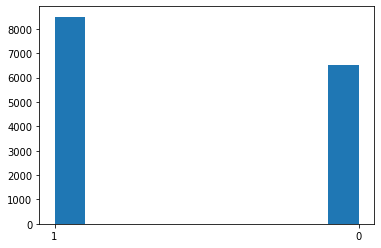

In [149]:
plt.hist(df3['RECENCY'].astype('str'))
plt.show()

## Usando UBML

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=29)
print(len(X_train))
print(len(X_test))

366261
91566


In [151]:
from ubml.train_test import classification_train_test
metrics_performance, best_model = classification_train_test(x_train=X_train, x_test=X_test, y_train=Y_train, y_test=Y_test)
print(best_model)
metrics_performance

Logistic Regression


,accuracy score train,accuracy score test,f1 score train,f1 score test,recall score train,recall score test,jaccard score train,jaccard score test,precision score train,precision score test
Logistic Regression,0.730,0.738,0.785,0.789,0.868,0.868,0.646,0.652,0.716,0.723
KNN Classifier,0.783,0.710,0.816,0.754,0.853,0.785,0.690,0.605,0.783,0.725
SVM Classifier,0.725,0.733,0.785,0.789,0.886,0.886,0.647,0.652,0.705,0.711
Naive Bayes Classifier,0.714,0.709,0.781,0.775,0.899,0.888,0.641,0.632,0.691,0.687
Decision Tree Classifier,0.924,0.690,0.934,0.728,0.947,0.736,0.875,0.572,0.920,0.721
Random Forest Classifier,0.924,0.720,0.935,0.761,0.963,0.791,0.877,0.615,0.907,0.734


In [163]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [164]:
y_pred_gini = clf_gini.predict(X_test)


In [172]:
from sklearn.metrics import confusion_matrix
# y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_gini)
print(cm)


[[20302 19231]
 [ 5018 47015]]


In [165]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.7352


In [166]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)


LogisticRegression()

In [199]:
## Exportar el modelo 
import joblib
joblib.dump(lr,"tinka_model_lr3.pkl")

['tinka_model_lr3.pkl']

In [167]:
Y_predic = lr.predict(X_test)

[1 1 1 ... 1 1 1]


In [187]:
prob_test_data = lr.predict_proba(X_test)
prob = prob_test_data[:,1]


In [180]:
result = pd.concat([X_test,Y_test],axis=1)
result.head(3)

,TOTAL_RECARGA,TOTAL_TRANSACCION,FRECUENCY,MONETARY,EDAD,DIAS_CON,INDICE_FELICIDAD,CASINO,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA,RECENCY
ID_CLIENTE,,,,,,,,,,,,,,,,,
1692027.0,20.0,1.0,5,5,41,0,1,1,0,0,0,0,0,0,0,0,1
1851349.0,80.0,1.0,5,5,41,0,1,0,0,0,0,0,0,0,1,0,1
2061765.0,15.0,1.0,5,5,20,0,1,0,1,0,0,0,0,0,0,0,1


In [197]:
result.to_csv("D:/resultado_abril.csv",sep=";")

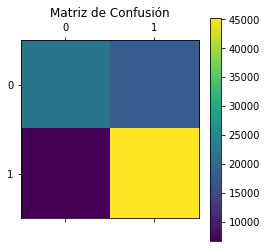

In [169]:
#Matriz de confusion 
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(Y_test, Y_predic)
pl.matshow(cm)
pl.title('Matriz de Confusión')
pl.colorbar()
pl.show()


In [170]:
from sklearn.metrics import confusion_matrix
# y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predic)
print(cm)


[[21740 17793]
 [ 6744 45289]]


In [171]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predic))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64     39533
           1       0.72      0.87      0.79     52033

    accuracy                           0.73     91566
   macro avg       0.74      0.71      0.71     91566
weighted avg       0.74      0.73      0.72     91566



# 3. Predicción

In [200]:
#Importar el modelo 
import joblib
model = joblib.load("tinka_model_lr3.pkl")

In [236]:
#Conexión database
conn1 = pyodbc.connect(DRIVER='{ODBC Driver 17 for SQL Server}',
                      SERVER='dblatinkadwh.database.windows.net',
                      DATABASE='DWH_LaTinka',
                      UID='sandra.sanchez',
                      PWD='Latinka01*')

In [237]:
# No se tomó en cuenta los datos con target null
q1 = """SELECT *
        FROM EDS.TABLON_VARIABLE_FUGA"""
df2 = pd.read_sql_query(q1, conn1)

#Cerrar conexión
conn1.close()


In [203]:
df2

,CODMES,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION,FECHA_PRIMERA_RECARGA,FECHA_ULTIMA_RECARGA,PRODUCTO_PRINCIPAL,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,INDICE_FELICIDAD
0,202304,1353400.0,30.0,1.0,2022-08-10,2022-08-10,Tinka,5. Ocasional,4. Perdido,5. Muy Bajo,1977-07-31,0.0
1,202304,959710.0,20.0,1.0,2022-12-02,2022-12-02,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1977-07-27,0.0
2,202304,1815598.0,80.0,1.0,2022-07-18,2022-07-18,Te Apuesto,5. Ocasional,4. Perdido,5. Muy Bajo,1981-10-21,1.0
3,202304,1986982.0,90.0,1.0,2022-11-06,2022-11-06,None,5. Ocasional,4. Perdido,5. Muy Bajo,1981-05-22,0.0
4,202304,2368223.0,300.0,1.0,2022-12-30,2022-12-30,Te Apuesto,5. Ocasional,4. Perdido,4. Bajo,1990-06-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
470125,202304,857247.0,20.0,1.0,2022-05-05,2022-05-05,Te Apuesto,3. Frecuente,4. Perdido,5. Muy Bajo,1996-05-09,1.0
470126,202304,1950088.0,20.0,1.0,2022-10-14,2022-10-14,Tinka,4. Habitual,4. Perdido,5. Muy Bajo,1993-10-26,0.0
470127,202304,681724.0,50.0,1.0,2022-05-17,2022-05-17,Raspaya,5. Ocasional,4. Perdido,5. Muy Bajo,1982-03-17,0.0
470128,202304,1277514.0,288.0,1.0,2022-10-23,2022-10-23,Tinka,5. Ocasional,4. Perdido,4. Bajo,1997-08-14,0.0


In [13]:
#df2 = df2.rename(columns={'TOTAL_TRANSACCION':'TOTAL_TRANSACCION_RECARGA','FECHA_PRIMERA_RECARGA':'FECHA_PRIMERA_ACCION','FECHA_ULTIMA_RECARGA':'FECHA_ULTIMA_ACCION','INDICE_FELICIDAD':'FLG_FELICIDAD'})

In [238]:
#Conversion de String a datetime
#df['FECHA_ALTA_SISTEMA'] = pd.to_datetime(df['FECHA_ALTA_SISTEMA'], format = "%Y-%m-%d")
df2['FECHA_NACIMIENTO'] = pd.to_datetime(df2['FECHA_NACIMIENTO'], format = "%Y-%m-%d",errors='coerce')
df2['FECHA_PRIMERA_RECARGA'] = pd.to_datetime(df2['FECHA_PRIMERA_RECARGA'], format="%Y-%m-%d",errors='coerce')
df2['FECHA_ULTIMA_RECARGA'] = pd.to_datetime(df2['FECHA_ULTIMA_RECARGA'], format = "%Y-%m-%d",errors='coerce')

In [239]:
df['INDICE_FELICIDAD'] = df['INDICE_FELICIDAD'].fillna(2)
# Eliminar filas con valores nulos
df2.dropna(inplace=True)


# Calular la Edad
df2['EDAD'] = ((datetime.now() - df2['FECHA_NACIMIENTO']
               ).dt.days / 365).round(0).astype("int64")

df2['DIAS_CON'] = (df2['FECHA_ULTIMA_RECARGA'] -
                  df2['FECHA_PRIMERA_RECARGA']).dt.days




In [240]:

# Reclass variables
# df2['PRODUCTO_PRINCIPAL'] = np.where(df2['PRODUCTO_PRINCIPAL'] == 'Tinka', 1,
#                                     np.where(df2['PRODUCTO_PRINCIPAL'] == 'Kabala', 2,
#                                              np.where(df2['PRODUCTO_PRINCIPAL'] == 'Te Apuesto', 3,
#                                                       np.where(df2['PRODUCTO_PRINCIPAL'] == 'Casino', 4,
#                                                                np.where(df2['PRODUCTO_PRINCIPAL'] == 'Gana Diario', 5,
#                                                                         np.where(df2['PRODUCTO_PRINCIPAL'] == 'Raspaya', 6,
#                                                                                  np.where(df2['PRODUCTO_PRINCIPAL'] == 'Kinelo', 7,
#                                                                                           np.where(df2['PRODUCTO_PRINCIPAL'] == 'Ganagol', 8, 9))))))))

#df2['ESTADO_CLIENTE'] = np.where(df2['ESTADO_CLIENTE'] == '4. No Activo', 4,
#                                np.where(df2['ESTADO_CLIENTE'] == '2. Recurrente', 2,
#                                         np.where(df2['ESTADO_CLIENTE'] == '3. Esporadico', 3, 1)))

df2['FRECUENCY'] = np.where(df2['FRECUENCY'] == '1. Permanente', 1,
                           np.where(df2['FRECUENCY'] == '1. Permanente', 1,
                                    np.where(df2['FRECUENCY'] == '2. Intensivo', 2,
                                             np.where(df2['FRECUENCY'] == '3. Frecuente', 3,
                                                      np.where(df2['FRECUENCY'] == '4. Habitual', 4, 5)))))

df2['MONETARY'] = np.where(df2['MONETARY'] == '1. Muy Alto', 1,
                          np.where(df2['MONETARY'] == '2. Alto', 2,
                          np.where(df2['MONETARY'] == '3. Medio', 3,
                                   np.where(df2['MONETARY'] == '4. Bajo', 4, 5))))

df2['RECENCY'] = np.where(df2['RECENCY'] == '4. Perdido', 1, 0)

df2['INDICE_FELICIDAD'] = np.where(df2['INDICE_FELICIDAD'] == 'No Feliz', 0, np.where(df2['INDICE_FELICIDAD'] == 2, 2, 1))


In [241]:
df2['PRODUCTO_PRINCIPAL'] = df2['PRODUCTO_PRINCIPAL'].str.upper()


In [242]:
dat1 = pd.get_dummies(df2.PRODUCTO_PRINCIPAL)
df_1 = pd.concat([df2.drop("PRODUCTO_PRINCIPAL", axis=1), dat1], axis=1)

In [243]:
df3 = df_1.loc[:, ['TOTAL_RECARGA', 'TOTAL_TRANSACCION',
                'FRECUENCY', 'MONETARY', 'RECENCY', 'EDAD', 'DIAS_CON', 'INDICE_FELICIDAD',
                   "CASINO", "DEPORTE VIRTUAL","GANA DIARIO","GANAGOL","KABALA","KINELO","RASPAYA","TE APUESTO","TINKA"]]

In [244]:
df3

,TOTAL_RECARGA,TOTAL_TRANSACCION,FRECUENCY,MONETARY,RECENCY,EDAD,DIAS_CON,INDICE_FELICIDAD,CASINO,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA
0,20.00,1.0,5,5,1,26,0,1,0,0,0,0,0,0,0,1,0
1,64.00,3.0,3,5,1,33,5,1,0,0,0,0,0,0,0,1,0
2,45.00,2.0,4,5,0,28,109,1,0,0,0,0,0,0,0,1,0
3,18.67,1.0,5,5,0,36,188,1,0,0,0,0,0,0,0,0,1
4,44.00,1.0,4,5,0,22,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437735,20.00,1.0,3,5,1,27,0,1,0,0,0,0,0,0,0,1,0
5437736,20.00,1.0,4,5,1,30,0,1,0,0,0,0,0,0,0,0,1
5437737,50.00,1.0,5,5,1,41,0,1,0,0,0,0,0,0,1,0,0
5437738,288.00,1.0,5,4,1,26,0,1,0,0,0,0,0,0,0,0,1


In [245]:
X_2023 = df3.drop(columns=['RECENCY'], axis=1)

In [246]:
X_2023.head()

,TOTAL_RECARGA,TOTAL_TRANSACCION,FRECUENCY,MONETARY,EDAD,DIAS_CON,INDICE_FELICIDAD,CASINO,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA
0,20.00,1.0,5,5,26,0,1,0,0,0,0,0,0,0,1,0
1,64.00,3.0,3,5,33,5,1,0,0,0,0,0,0,0,1,0
2,45.00,2.0,4,5,28,109,1,0,0,0,0,0,0,0,1,0
3,18.67,1.0,5,5,36,188,1,0,0,0,0,0,0,0,0,1
4,44.00,1.0,4,5,22,0,1,0,0,0,0,0,0,0,1,0


In [247]:
Y_predict_2023 = model.predict(X_2023)
Y_predict_prob_2023 = model.predict_proba(X_2023)

In [248]:
len(Y_predict_2023)

4945976

In [249]:
Y_predict_prob_2023[:,1]

array([0.78701908, 0.73071884, 0.53071798, ..., 0.75186282, 0.66091219,
       0.80326124])

In [251]:
#Probabilidad de no activo = PROB_REG_LOG
#no activo = 0 , Activo = 1
df3['REG_LOG'] = Y_predict_2023
df3['PROB_REG_LOG'] = Y_predict_prob_2023[:,1]

In [252]:
df3.head()

,TOTAL_RECARGA,TOTAL_TRANSACCION,FRECUENCY,MONETARY,RECENCY,EDAD,DIAS_CON,INDICE_FELICIDAD,CASINO,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA,REG_LOG,PROB_REG_LOG
0,20.00,1.0,5,5,1,26,0,1,0,0,0,0,0,0,0,1,0,1,0.787019
1,64.00,3.0,3,5,1,33,5,1,0,0,0,0,0,0,0,1,0,1,0.730719
2,45.00,2.0,4,5,0,28,109,1,0,0,0,0,0,0,0,1,0,1,0.530718
3,18.67,1.0,5,5,0,36,188,1,0,0,0,0,0,0,0,0,1,0,0.269508
4,44.00,1.0,4,5,0,22,0,1,0,0,0,0,0,0,0,1,0,1,0.765857


In [253]:
# Probabilidad de no activo = PROB_REG_LOG
# no activo = 0 , Activo = 1
df_1['REG_LOG'] = Y_predict_2023
df_1['PROB_REG_LOG'] = Y_predict_prob_2023[:,1]

In [254]:
df_1.head()

,CODMES,ID_CLIENTE,TOTAL_RECARGA,TOTAL_TRANSACCION,FECHA_PRIMERA_RECARGA,FECHA_ULTIMA_RECARGA,FRECUENCY,RECENCY,MONETARY,FECHA_NACIMIENTO,...,DEPORTE VIRTUAL,GANA DIARIO,GANAGOL,KABALA,KINELO,RASPAYA,TE APUESTO,TINKA,REG_LOG,PROB_REG_LOG
0,202301,1870460.0,20.00,1.0,2022-11-30,2022-11-30,5,1,5,1997-03-25,...,0,0,0,0,0,0,1,0,1,0.787019
1,202301,2031003.0,64.00,3.0,2022-11-19,2022-11-24,3,1,5,1990-05-25,...,0,0,0,0,0,0,1,0,1,0.730719
2,202301,1861970.0,45.00,2.0,2022-08-16,2022-12-03,4,0,5,1995-06-17,...,0,0,0,0,0,0,1,0,1,0.530718
3,202301,839610.0,18.67,1.0,2022-07-07,2023-01-11,5,0,5,1986-12-24,...,0,0,0,0,0,0,0,1,0,0.269508
4,202301,2153536.0,44.00,1.0,2022-12-13,2022-12-13,4,0,5,2001-07-01,...,0,0,0,0,0,0,1,0,1,0.765857


In [255]:
# df final
dff = df_1[['CODMES','ID_CLIENTE','PROB_REG_LOG']]

In [258]:
valores = [0, 0.5, 0.7, 0.8, 1]
quintil = [0, 0.2, 0.4, 0.6, 0.8, 1]
decil = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


cat = ["Segmento 0","Segmento 1", "Segmento 2", "Segmento 3"]
catquintil = ["k1","k2","k3","k4","k5"]
catdecil = ["d1","d2","d3","d4","d5","d6","d7","d8","d9","d10"]
dff['GRUPO_FUGA']= pd.cut(dff['PROB_REG_LOG'], bins=valores, labels=cat)
dff['QUINTIL'] = pd.cut(dff['PROB_REG_LOG'], bins=quintil, labels=catquintil)
dff['DECIL'] = pd.cut(dff['PROB_REG_LOG'],bins=decil, labels=catdecil)

In [259]:
dff.shape

(4945976, 6)

## Carga de Datos 

In [257]:
conn3 = pyodbc.connect(DRIVER='{ODBC Driver 17 for SQL Server}',
                      SERVER='dblatinkadwh.database.windows.net',
                      DATABASE='DWH_LaTinka',
                       UID='diego.rojass',
                       PWD='Latinka01*')

In [260]:
cursor = conn3.cursor()
cursor.fast_executemany = True
# Borrar los datos de la tabla ml.cluste_2022
cursor.execute("TRUNCATE TABLE BDS.CLIENTE_RATIO_FUGA")
conn3.commit()


In [261]:
# Insertar valores
sql_insert = """INSERT INTO BDS.CLIENTE_RATIO_FUGA VALUES (?,?,?,?,?,?)"""
val = dff[['CODMES', 'ID_CLIENTE', 'PROB_REG_LOG',
          'GRUPO_FUGA','QUINTIL','DECIL']].values.tolist()
cursor.fast_executemany = True
cursor.executemany(sql_insert, val)
conn3.commit()
# Cerrar las conexiones
conn3.close()
